In [354]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [2]:
file_path = r'D:\customer_seg\books_data\users.csv'
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.7298050993086124, 'language': ''}


In [3]:

# Load the converted file
df_users = pd.read_csv(r'D:\customer_seg\books_data\users.csv', delimiter=';', encoding='ISO-8859-1')
df_books = pd.read_csv(r'D:\customer_seg\books_data\books.csv', delimiter=';', encoding='ISO-8859-1',on_bad_lines='skip')
df_ratings = pd.read_csv(r'D:\customer_seg\books_data\ratings.csv', delimiter=';', encoding='ISO-8859-1',on_bad_lines='skip')


C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28356\1674721076.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv(r'D:\customer_seg\books_data\books.csv', delimiter=';', encoding='ISO-8859-1',on_bad_lines='skip')


In [4]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users_ratings = pd.merge(df_users, df_ratings, on='User-ID', how='inner')

In [8]:
users_ratings.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [19]:
merged_data = pd.merge(users_ratings, df_books, on='ISBN', how='inner')

In [20]:
merged_data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,8,"timmins, ontario, canada",NaN,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,8,"timmins, ontario, canada",NaN,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,8,"timmins, ontario, canada",NaN,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [21]:
merged_data.columns

Index(['User-ID', 'Location', 'Age', 'ISBN', 'Book-Rating', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [22]:
merged_data.shape

(1031136, 12)

In [23]:
# Define the start and end dates
start_date = pd.to_datetime('2022-11-01')
end_date = pd.to_datetime('2024-06-30')

# Number of rows in the dataset
num_rows = len(merged_data)  # Replace 'merged_data' with your DataFrame name

# Generate random timestamps using numpy.uniform
random_timestamps = np.random.uniform(start_date.timestamp(), end_date.timestamp(), num_rows)

# Convert timestamps back to datetime
random_dates = pd.to_datetime(random_timestamps, unit='s')

# Add the random dates as a new column
merged_data['Random_Date'] = random_dates

In [29]:
merged_data['Price'] = np.random.randint(100,500, size=len(merged_data))

In [39]:
reference_date = merged_data['Random_Date'].min()  # Earliest date in your dataset
merged_data['Days_Since_Start'] = (merged_data['Random_Date'] - reference_date).dt.days


In [40]:
merged_data.drop(columns=['Image-URL-S',
       'Image-URL-M', 'Image-URL-L'], inplace=True)

KeyError: "['Image-URL-S', 'Image-URL-M', 'Image-URL-L'] not found in axis"

In [41]:
merged_data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Random_Date,Price,Days_Since_Start
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2024-05-02 12:42:00.691794634,412,548
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,2023-02-18 23:05:47.805353165,316,109
2,8,"timmins, ontario, canada",NaN,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,2024-01-29 22:47:32.333401203,145,454
3,8,"timmins, ontario, canada",NaN,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,2024-01-15 09:30:48.732638836,387,440
4,8,"timmins, ontario, canada",NaN,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,2022-12-04 10:18:59.519539832,341,33


In [42]:
merged_data.to_csv(r'D:\customer_seg\books_data\merged_data.csv', index=False, encoding='utf-8')


In [356]:
sampled_data = merged_data.sample(frac=90000/1031136, random_state=42)  # Take 10% of the data


In [357]:
sampled_data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Random_Date,Price,Days_Since_Start
770118,210597,"lake winnebago, missouri, usa",38.0,0966103254,8,Poor Richard's E-mail Publishing,Chris Pirillo,1999,Top Floor Publishing,2022-11-26 15:08:38.302276850,424,25
454727,125224,"düren, nordrhein-westfalen, germany",21.0,3257061269,0,Der Alchimist.,Paulo Coelho,2003,"Diogenes Verlag, ZÃ?Â¼rich",2024-02-10 23:13:03.715767145,262,466
71725,20201,"grove city, ohio, usa",31.0,0880381329,0,Cat's-Paw (Marvel Super Heroes module MH5),Jeff Grubb,1985,Wizards of the Coast,2023-12-02 13:53:36.135351181,212,396
535451,146564,"bardstown, kentucky, usa",43.0,0061094188,0,Dressed for Death: A Guido Brunetti Mystery,Donna Leon,1995,HarperCollins Publishers,2023-09-04 14:20:39.325560808,445,307
46502,12917,"moore, oklahoma, usa",24.0,0399141065,0,Contagion,Robin Cook,1995,Putnam Pub Group,2023-03-03 22:33:56.400380373,193,122


In [358]:
sampled_data = sampled_data[~sampled_data['User-ID'].isnull()]  # Exclude null User-IDs
sampled_data = sampled_data[sampled_data['User-ID'] != ''] 

In [359]:
encoder = LabelEncoder()
#sampled_data['User-ID'] = encoder.fit_transform(sampled_data['User-ID'])
sampled_data['ISBN'] = encoder.fit_transform(sampled_data['ISBN'])
sampled_data['Book-Title'] = encoder.fit_transform(sampled_data['Book-Title'])
sampled_data['Book-Author'] = encoder.fit_transform(sampled_data['Book-Author'])
sampled_data['Location'] = encoder.fit_transform(sampled_data['Location'])
sampled_data['Publisher'] = encoder.fit_transform(sampled_data['Publisher'])


In [360]:
sampled_data['Age'] = sampled_data['Age'].fillna(sampled_data['Age'].median())  # Fill missing ages with median
sampled_data['Book-Rating'] = sampled_data['Book-Rating'].fillna(sampled_data['Book-Rating'].mode()[0])  # Fill with mode

In [361]:
sampled_data.dtypes

User-ID                         int64
Location                        int64
Age                           float64
ISBN                            int64
Book-Rating                     int64
Book-Title                      int64
Book-Author                     int64
Year-Of-Publication            object
Publisher                       int64
Random_Date            datetime64[ns]
Price                           int32
Days_Since_Start                int64
dtype: object

In [362]:
for feature in sampled_data.columns:
    if sampled_data[feature].dtype in ['float64', 'int64']:
        Q1 = sampled_data[feature].quantile(0.25)
        Q3 = sampled_data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        sampled_data = sampled_data[
            (sampled_data[feature] >= lower_bound) & (sampled_data[feature] <= upper_bound)
        ]

# Optional: Fill NaN values after handling outliers
# features = sampled_data.fillna(sampled_data.median())

Clustering on the basis of age, location of the users and which books they prefer based on the books they choose.

In [374]:
features = sampled_data[['Age','Location','ISBN']]

In [375]:
# encoder = LabelEncoder()
# #features['Book-Title'] = encoder.fit_transform(features['Book-Title'])
# features['Book-Author'] = encoder.fit_transform(features['Book-Author'])
# features['Location'] = encoder.fit_transform(features['Location'])

In [376]:
features['Age'] = features['Age'].fillna(features['Age'].median())  # Fill missing ages with median
#features['Book-Rating'] = features['Book-Rating'].fillna(features['Book-Rating'].mode()[0])  # Fill with mode

C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28356\435789522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age'] = features['Age'].fillna(features['Age'].median())  # Fill missing ages with median


In [377]:
features.head()

,Age,Location,ISBN
770118,38.0,3928,45658
454727,21.0,2135,51481
71725,31.0,2996,43582
535451,43.0,501,2380
46502,24.0,4886,17483


In [378]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

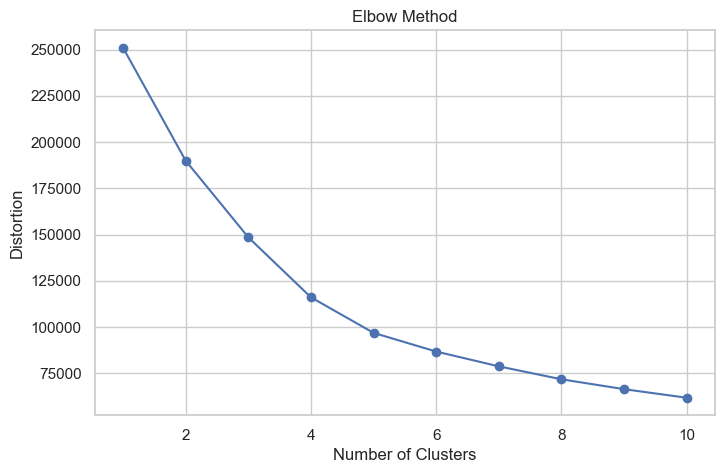

In [379]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [380]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# best_score = -1
# best_k = None

# for k in range(2, 11):  # Test clusters from 2 to 10
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(scaled_features)
#     score = silhouette_score(scaled_features, labels)
#     print(f"Silhouette Score for {k} clusters: {score:.2f}")
    
#     if score > best_score:
#         best_score = score
#         best_k = k

# print(f"Best number of clusters: {best_k} with Silhouette Score: {best_score:.2f}")

In [381]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose 5 clusters
clusters = kmeans.fit_predict(scaled_features)

In [382]:
# Save the scaler and model
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))

In [383]:
features['Cluster'] = clusters

C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28356\3858055607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster'] = clusters


In [384]:
features.to_csv('clustered_books.csv', index=False)

In [373]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
features['PCA1'] = reduced_features[:, 0]
features['PCA2'] = reduced_features[:, 1]

C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28356\4228661988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['PCA1'] = reduced_features[:, 0]
C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28356\4228661988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['PCA2'] = reduced_features[:, 1]


In [60]:
features.head()

,Age,Location,ISBN,Cluster,PCA1,PCA2
770118,38.0,3928,45658,2,0.767868,-0.193902
454727,21.0,2135,51481,2,2.600712,-0.452427
71725,31.0,2996,43582,2,1.324561,-0.385860
535451,43.0,501,2380,1,-1.458923,-1.776368
46502,24.0,4886,17483,0,0.545566,0.511853


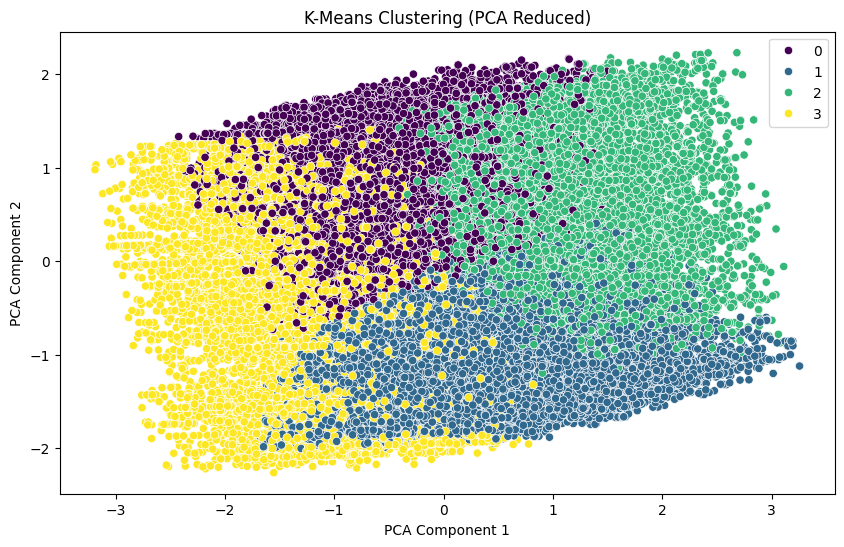

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=features, palette='viridis')
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [332]:
sampled_data.dtypes

User-ID                         int64
Location                        int64
Age                           float64
ISBN                            int64
Book-Rating                     int64
Book-Title                      int64
Book-Author                     int64
Year-Of-Publication            object
Publisher                       int64
Random_Date            datetime64[ns]
Price                           int32
Days_Since_Start                int64
dtype: object

Segregation of the books based on their ratings by the users

In [349]:
features = sampled_data[['Book-Title','Book-Author','Publisher','Price','Book-Rating']]

In [350]:
#features = sampled_data[['Book-Title','Book-Author','Publisher','Book-Rating']]

In [351]:
features.shape

(83665, 5)

In [352]:
features.head()

,Book-Title,Book-Author,Publisher,Price,Book-Rating
770118,29288,3865,4613,424,8
454727,10167,19095,1273,262,0
71725,6875,11183,5077,212,0
535451,11646,6011,2071,445,0
46502,8266,20868,3776,193,0


In [337]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

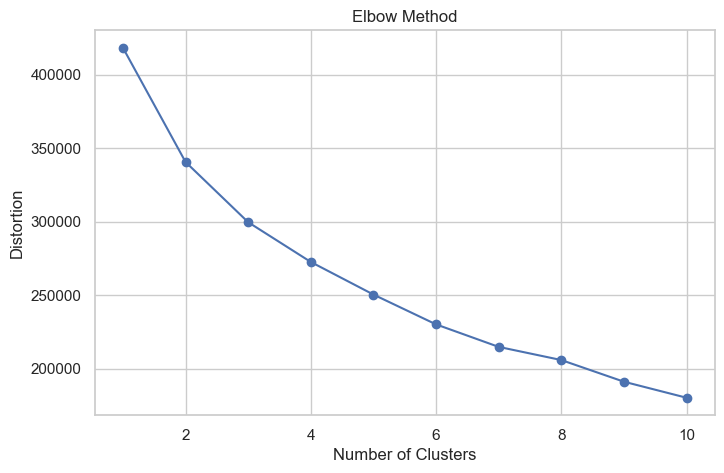

In [338]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [344]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose 5 clusters
clusters = kmeans.fit_predict(scaled_features)

In [345]:
features['Cluster'] = clusters

C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28356\3858055607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster'] = clusters


In [346]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
features['PCA1'] = reduced_features[:, 0]
features['PCA2'] = reduced_features[:, 1]

C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28356\4228661988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['PCA1'] = reduced_features[:, 0]
C:\Users\Kerissa College\AppData\Local\Temp\ipykernel_28356\4228661988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['PCA2'] = reduced_features[:, 1]


In [347]:
features.head()

,Book-Title,Book-Author,Publisher,Price,Book-Rating,Cluster,PCA1,PCA2
770118,29288,3865,4613,424,8,1,-0.021987,0.106365
454727,10167,19095,1273,262,0,4,-0.093153,-0.741309
71725,6875,11183,5077,212,0,3,0.740989,-0.776156
535451,11646,6011,2071,445,0,2,-0.787790,-1.770177
46502,8266,20868,3776,193,0,3,1.077504,-0.490517


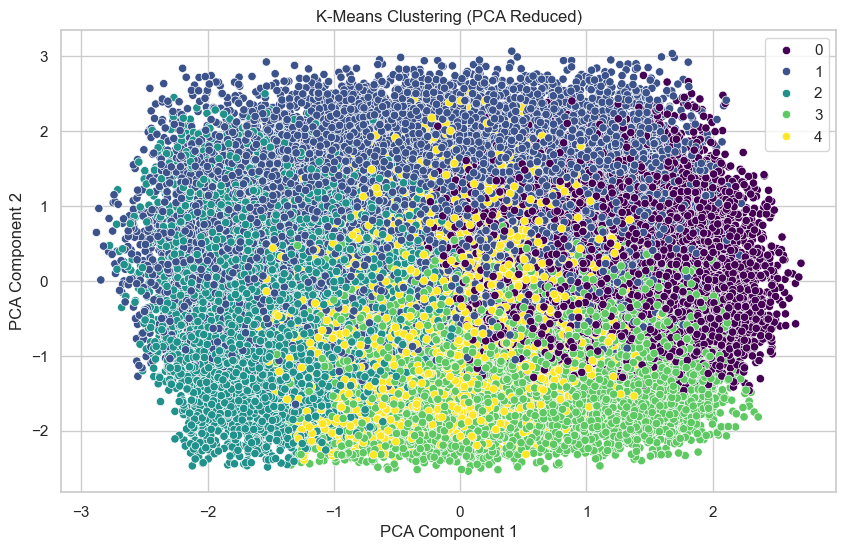

In [348]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=features, palette='viridis')
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

---------------------------

In [209]:
sampled_data = merged_data

In [210]:
#sampled_data = merged_data.sample(frac=500000/1031136, random_state=42)  # Take 10% of the data

In [211]:
sampled_data.shape

(1031136, 12)

In [212]:
sampled_data = sampled_data[~sampled_data['User-ID'].isnull()]  # Exclude null User-IDs
sampled_data = sampled_data[sampled_data['User-ID'] != ''] 

In [213]:
#sampled_data['User-ID'] = encoder.fit_transform(sampled_data['User-ID'])
sampled_data['ISBN'] = encoder.fit_transform(sampled_data['ISBN'])
sampled_data['Book-Title'] = encoder.fit_transform(sampled_data['Book-Title'])
sampled_data['Book-Author'] = encoder.fit_transform(sampled_data['Book-Author'])
sampled_data['Location'] = encoder.fit_transform(sampled_data['Location'])
sampled_data['Publisher'] = encoder.fit_transform(sampled_data['Publisher'])

In [214]:
sampled_data['Age'] = sampled_data['Age'].fillna(sampled_data['Age'].median())  # Fill missing ages with median
sampled_data['Book-Rating'] = sampled_data['Book-Rating'].fillna(sampled_data['Book-Rating'].mode()[0])

In [239]:
sampled_data.shape

(1031136, 12)

In [240]:
# for feature in sampled_data.columns:
#     if sampled_data[feature].dtype in ['float64', 'int64']:
#         Q1 = sampled_data[feature].quantile(0.25)
#         Q3 = sampled_data[feature].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5*IQR
#         upper_bound = Q3 + 1.5*IQR
#         sampled_data = sampled_data[
#             (sampled_data[feature] >= lower_bound) & (sampled_data[feature] <= upper_bound)
#         ]

# # Optional: Fill NaN values after handling outliers
# # features = sampled_data.fillna(sampled_data.median())

In [271]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
numerical_columns = ['Age', 'Book-Rating', 'Days_Since_Start','Price']  # Add more features like Frequency if calculated
scaler = StandardScaler()
sampled_data[numerical_columns] = scaler.fit_transform(sampled_data[numerical_columns])


In [272]:
user_stats = sampled_data.groupby('User-ID').agg(
    Frequency=('ISBN', 'count'),  # Count of books interacted with
    Average_Rating=('Book-Rating', 'mean'),  # Average rating given by the user
    Average_Age=('Age', 'mean'),  # Average age (if needed)
    Total_Revenue_from_User = ('Price','sum'),
    Last_Time_Purchased = ('Days_Since_Start','max')
).reset_index()


In [273]:
import numpy as np

user_stats['Frequency_log'] = np.log1p(user_stats['Frequency'])
user_stats['Log_Avg_Rating'] = np.log1p(user_stats['Average_Rating'])



In [274]:
user_stats.shape

(92106, 8)

In [275]:
user_stats.head()

,User-ID,Frequency,Average_Rating,Average_Age,Total_Revenue_from_User,Last_Time_Purchased,Frequency_log,Log_Avg_Rating
0,2,1,-0.736621,-1.550107,0.974009,1.398716,0.693147,-1.334161
1,8,17,-0.141389,-0.144797,-0.055707,1.461473,2.890372,-0.152439
2,9,3,-0.217700,-0.144797,-1.949642,1.712500,1.386294,-0.245518
3,10,1,-0.736621,-0.888785,0.056785,-0.375587,0.693147,-1.334161
4,12,1,1.857982,-0.144797,1.216295,-1.299822,0.693147,1.050116


In [280]:
features=user_stats[['Average_Age','Frequency_log', 'Log_Avg_Rating', 'Total_Revenue_from_User', 'Last_Time_Purchased']]

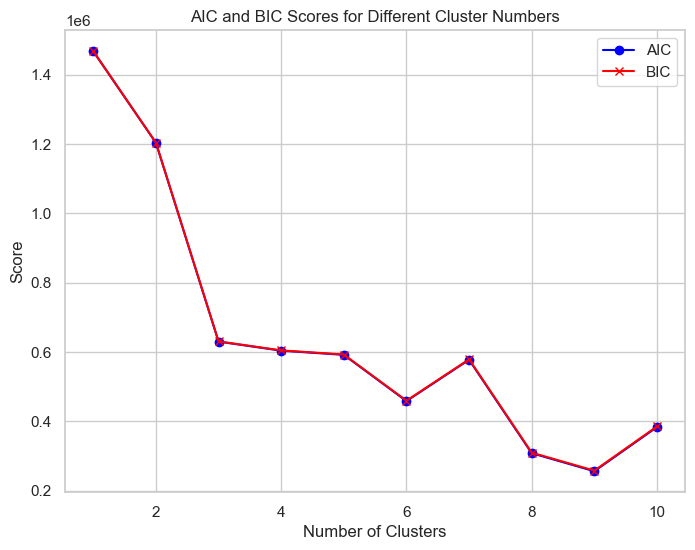

In [281]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Fit GMM for different numbers of components (clusters)
n_components_range = range(1, 11)  # Try 1 to 10 clusters
aic_scores = []
bic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(features)  # Assuming `features` is your data
    aic_scores.append(gmm.aic(features))
    bic_scores.append(gmm.bic(features))

# Plot the AIC and BIC scores to find the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, aic_scores, label='AIC', color='blue', marker='o')
plt.plot(n_components_range, bic_scores, label='BIC', color='red', marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Different Cluster Numbers')
plt.legend()
plt.show()
 

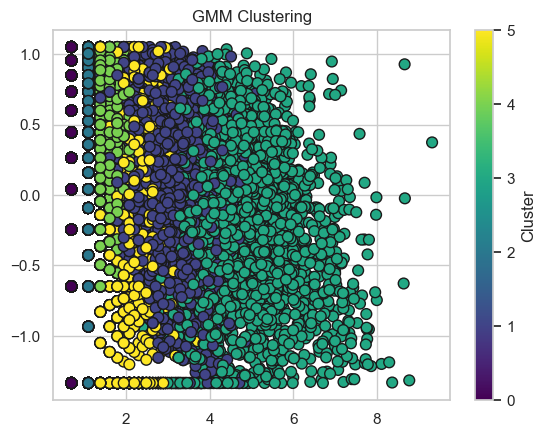

In [290]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)  # Adjust number of clusters
user_stats['Cluster'] = gmm.fit_predict(user_stats[['Average_Age','Frequency_log', 'Log_Avg_Rating', 'Total_Revenue_from_User', 'Last_Time_Purchased']])

plt.scatter(user_stats['Frequency_log'], user_stats['Log_Avg_Rating'], c=user_stats['Cluster'], cmap='viridis', s=60, edgecolor='k')
plt.colorbar(label='Cluster')
plt.title('GMM Clustering')
plt.show()


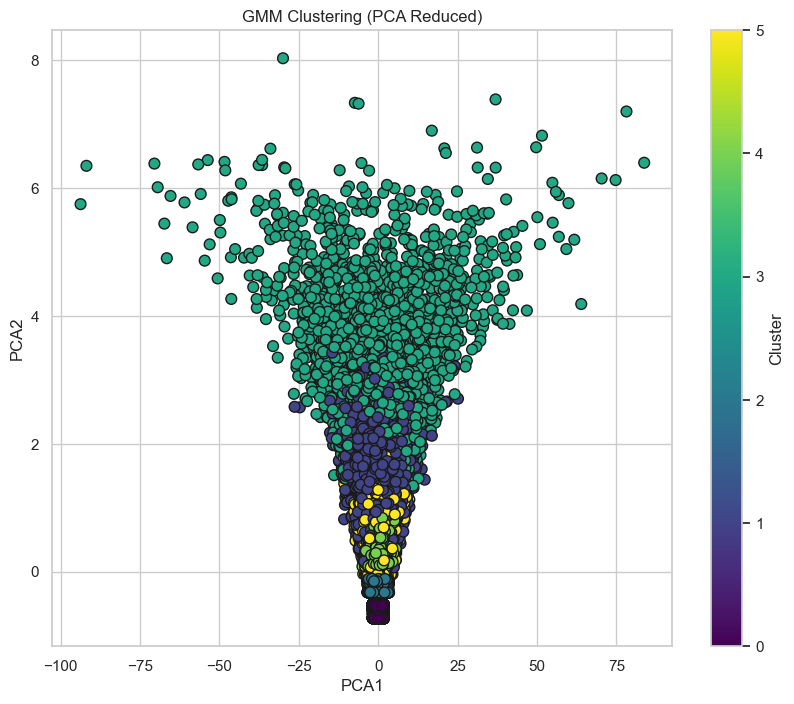

In [294]:

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(user_stats[[ 'Frequency_log', 'Log_Avg_Rating', 'Total_Revenue_from_User']])

# Create a DataFrame with PCA components and cluster labels
user_stats['PCA1'] = pca_components[:, 0]
user_stats['PCA2'] = pca_components[:, 1]

# Plot the clusters in the reduced 2D space
plt.figure(figsize=(10, 8))
plt.scatter(user_stats['PCA1'], user_stats['PCA2'], c=user_stats['Cluster'], cmap='viridis', s=60, edgecolor='k')
plt.colorbar(label='Cluster')
plt.title('GMM Clustering (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [287]:
user_stats['Segment'] = user_stats['Cluster'].map({
     0: 'Noise',              # Outliers or unidentified users
     1: 'Loyal Customers',    # Frequent users with high ratings
     2: 'Casual Users',       # Users with moderate frequency or ratings
     3: 'At-Risk Users',      # Users showing declining engagement
     4: 'New Users',          # Recently active, but not frequent yet
     5: 'High-Value Users'    # Very frequent and highly rated users
})

In [291]:
user_stats[user_stats['Segment']=='Noise']

,User-ID,Frequency,Average_Rating,Average_Age,Total_Revenue_from_User,Last_Time_Purchased,Frequency_log,Log_Avg_Rating,Cluster,Segment
10,22,4,-0.282566,-0.144797,4.034487,1.341664,1.609438,-0.332074,5,Noise
17,44,5,-0.321485,1.177846,2.161641,1.649743,1.791759,-0.387848,5,Noise
27,75,4,-0.412296,0.020533,3.575875,0.799675,1.609438,-0.531531,5,Noise
47,114,8,1.371494,1.673838,1.042692,1.695384,2.197225,0.863520,5,Noise
53,139,3,-0.736621,-0.144797,-1.681398,0.771149,1.386294,-1.334161,5,Noise
...,...,...,...,...,...,...,...,...,...,...
92056,278723,7,-0.588358,1.260512,1.730069,1.495704,2.079442,-0.887601,5,Noise
92070,278771,11,-0.736621,-0.144797,-3.122133,1.529935,2.484907,-1.334161,5,Noise
92073,278774,5,-0.736621,-0.310128,4.463354,1.547050,1.791759,-1.334161,5,Noise
92096,278832,3,1.857982,2.087164,1.849049,0.303326,1.386294,1.050116,5,Noise


In [288]:
user_stats[user_stats['Segment']=='Casual Users']

,User-ID,Frequency,Average_Rating,Average_Age,Total_Revenue_from_User,Last_Time_Purchased,Frequency_log,Log_Avg_Rating,Cluster,Segment
1,8,17,-0.141389,-0.144797,-0.055707,1.461473,2.890372,-0.152439,2,Casual Users
7,17,7,0.041760,-0.144797,2.560762,1.632627,2.079442,0.040911,2,Casual Users
19,53,7,0.301220,-0.144797,2.006967,1.427242,2.079442,0.263302,2,Casual Users
42,99,12,0.582302,0.433859,2.446649,1.706794,2.564949,0.458881,2,Casual Users
63,183,8,0.593113,-0.806119,-0.835021,1.712500,2.197225,0.465690,2,Casual Users
...,...,...,...,...,...,...,...,...,...,...
92027,278633,73,0.372305,-0.144797,-1.115718,1.638333,4.304065,0.316492,2,Casual Users
92030,278637,16,-0.152835,-0.144797,-9.561630,1.661153,2.833213,-0.165860,2,Casual Users
92048,278694,9,1.281403,1.673838,2.553191,1.535640,2.302585,0.824791,2,Casual Users
92103,278851,23,0.289939,-0.310128,-0.986994,1.626922,3.178054,0.254595,2,Casual Users


In [289]:
user_stats[user_stats['Segment']=='At-Risk Users']

,User-ID,Frequency,Average_Rating,Average_Age,Total_Revenue_from_User,Last_Time_Purchased,Frequency_log,Log_Avg_Rating,Cluster,Segment
0,2,1,-0.736621,-1.550107,0.974009,1.398716,0.693147,-1.334161,3,At-Risk Users
3,10,1,-0.736621,-0.888785,0.056785,-0.375587,0.693147,-1.334161,3,At-Risk Users
4,12,1,1.857982,-0.144797,1.216295,-1.299822,0.693147,1.050116,3,At-Risk Users
8,19,1,1.079601,-1.880768,-1.076765,-0.478280,0.693147,0.732176,3,At-Risk Users
9,20,1,-0.736621,-1.467441,-1.128683,0.063710,0.693147,-1.334161,3,At-Risk Users
...,...,...,...,...,...,...,...,...,...,...
92094,278828,1,1.339061,-0.144797,1.657601,-0.506806,0.693147,0.849750,3,At-Risk Users
92095,278831,1,1.857982,-0.144797,-1.120030,0.503007,0.693147,1.050116,3,At-Risk Users
92097,278836,1,1.339061,0.847185,0.108704,0.445955,0.693147,0.849750,3,At-Risk Users
92101,278846,1,1.339061,-1.136780,-0.548928,-0.118855,0.693147,0.849750,3,At-Risk Users


----------------------------------

In [257]:
from sklearn.cluster import KMeans

# Select features for clustering
features = user_stats[['Frequency_log', 'Average_Rating','Average_Age','Last_Time_Purchased']]
kmeans = KMeans(n_clusters=3, random_state=42)
user_stats['Cluster'] = kmeans.fit_predict(features)


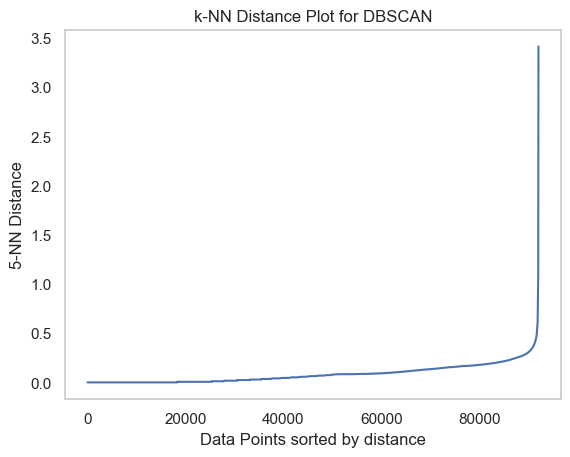

In [258]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Features for clustering
X = features.values

# Nearest neighbors analysis
k = 5  # Typically set to 'min_samples'
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances and plot
distances = np.sort(distances[:, k-1], axis=0)  # k-th nearest neighbor distance
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-NN Distance')
plt.title('k-NN Distance Plot for DBSCAN')
plt.grid()
plt.show()

In [259]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.45, min_samples=5)  # Adjust eps and min_samples as needed
user_stats['Cluster'] = dbscan.fit_predict(features)


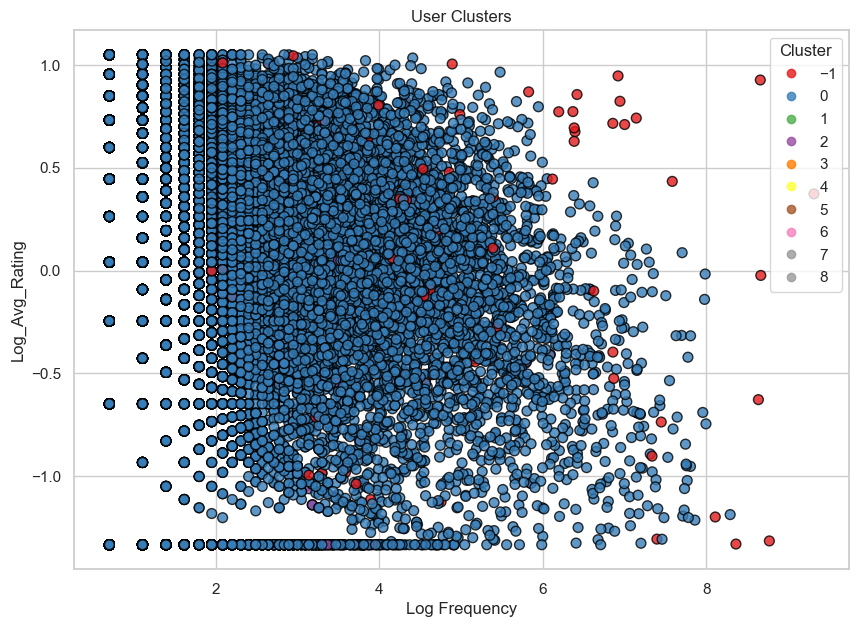

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn for consistent styling
sns.set(style="whitegrid")  

# Scatter plot with improved visibility
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    user_stats['Frequency_log'], 
    user_stats['Log_Avg_Rating'], 
    c=user_stats['Cluster'], 
    cmap='Set1',       # Use a bright colormap like 'tab10' or 'Set1'
    edgecolor='black',  # Add black borders to markers
    s=50,               # Increase marker size
    alpha=0.8           # Set transparency
)

# Add legend
plt.legend(*scatter.legend_elements(), title="Cluster", loc="upper right")

# Add labels and title
plt.xlabel('Log Frequency')
plt.ylabel('Log_Avg_Rating')
plt.title('User Clusters')

# Display the plot
plt.show()


In [261]:
user_stats['Segment'] = user_stats['Cluster'].map({
    -1: 'Noise',              # Outliers or unidentified users
     0: 'Loyal Customers',    # Frequent users with high ratings
     1: 'Casual Users',       # Users with moderate frequency or ratings
     2: 'At-Risk Users',      # Users showing declining engagement
     3: 'New Users',          # Recently active, but not frequent yet
     4: 'High-Value Users'    # Very frequent and highly rated users
})


In [262]:
user_stats.head()

,User-ID,Frequency,Average_Rating,Average_Age,Last_Time_Purchased,Frequency_log,Log_Avg_Rating,Cluster,Segment
0,2,1,-0.736621,-1.550107,1.398716,0.693147,-1.334161,0,Loyal Customers
1,8,17,-0.141389,-0.144797,1.461473,2.890372,-0.152439,0,Loyal Customers
2,9,3,-0.217700,-0.144797,1.712500,1.386294,-0.245518,0,Loyal Customers
3,10,1,-0.736621,-0.888785,-0.375587,0.693147,-1.334161,0,Loyal Customers
4,12,1,1.857982,-0.144797,-1.299822,0.693147,1.050116,0,Loyal Customers


In [263]:
user_stats[user_stats['Segment']=='Casual Users'].shape

(8, 9)

In [264]:
user_stats[user_stats['Segment']=='At-Risk Users']

,User-ID,Frequency,Average_Rating,Average_Age,Last_Time_Purchased,Frequency_log,Log_Avg_Rating,Cluster,Segment
6559,20845,16,-0.736621,-3.038081,1.638333,2.833213,-1.334161,2,At-Risk Users
6564,20851,22,-0.654065,-3.038081,1.615512,3.135494,-1.061506,2,At-Risk Users
7801,24462,40,-0.425269,-2.955416,1.706794,3.713572,-0.553853,2,At-Risk Users
9567,29627,10,-0.736621,-3.038081,1.170510,2.397895,-1.334161,2,At-Risk Users
28197,85212,12,-0.736621,-2.872751,1.432947,2.564949,-1.334161,2,At-Risk Users
31974,96496,33,-0.516473,-3.038081,1.683974,3.526361,-0.726648,2,At-Risk Users
39915,120860,37,0.189021,-2.872751,1.706794,3.637586,0.173130,2,At-Risk Users
57571,174509,35,-0.269593,-2.790085,1.592691,3.583519,-0.314153,2,At-Risk Users
66628,202919,31,-0.418573,-2.955416,1.518524,3.465736,-0.542270,2,At-Risk Users
69496,211043,8,-0.736621,-3.038081,1.415831,2.197225,-1.334161,2,At-Risk Users
